<a href="https://colab.research.google.com/github/jayu071/Content-Based-Flitering-Movies-Recommandation-/blob/main/Content_Based_Flitering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <u><b> Content-Based Filtering </b></u>

### We all have used services like Netflix, Amazon, and Youtube. These services use very sophisticated systems to recommend the best items to their users to make their experiences great. But, how do they achieve such great systems?  
### Content-Based recommender system tries to guess the features or behavior of a user given the item’s features, he/she reacts positively to.This method uses only information about the description and attributes of the items users has previously consumed to model user's preferences. In other words, these algorithms try to recommend items that are similar to those that a user liked in the past (or is examining in the present). In particular, various candidate items are compared with items previously rated by the user and the best-matching items are recommended. 

* ### Content-based filtering approaches leverage description or attributes from items the user has interacted to recommend similar items. It depends only on the user previous choices, making this method robust to avoid the *cold-start* problem. For textual items, like articles, news and books, it is simple to use the raw text to build item profiles and user profiles.  

* ### Here we are using a very popular technique in information retrieval (search engines) named [TF-IDF](https://en.wikipedia.org/wiki/Tf%E2%80%93idf). This technique converts unstructured text into a vector structure, where each word is represented by a position in the vector, and the value measures how relevant a given word is for an article. In this session, you will learn how to build a basic model of simple and content-based recommender systems. 

In [ ]:
import numpy as np
import pandas as pd
import sklearn
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###Recommender systems are among the most popular applications of data science today. They are used to predict the "rating" or "preference" that a user would give to an item. Almost every major tech company has applied them in some form. Amazon uses it to suggest products to customers, YouTube uses it to decide which video to play next on autoplay, and Facebook uses it to recommend pages to like and people to follow.  
###Recommender systems have also been developed to explore research articles and experts, collaborators, and financial services. YouTube uses the recommendation system at a large scale to suggest you videos based on your history. 

In [ ]:
# Load Movies Metadata
movies_df = pd.read_csv('/content/drive/MyDrive/Datasets/movies_metadata.csv')

# Print the first five rows
movies_df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


# <u><b> Simple Recommenders </b></u>
###Simple recommenders are basic systems that recommend the top items based on a certain metric or score.  
###The following are the steps involved:

1. Decide on the metric or score to rate movies on.

2. Calculate the score for every movie.

3. Sort the movies based on the score and output the top results.  

###One of the most basic metrics you can think of is the ranking to decide which top movies are, based on their respective ratings.However, using a rating as a metric has a few caveats:

1. For one, it does not take into consideration the popularity of a movie. Therefore, a movie with a rating of 9 from 10 voters will be considered 'better' than a movie with a rating of 8.9 from 10,000 voters.

2. On a related note, this metric will also tend to favor movies with a smaller number of voters with skewed and/or extremely high ratings. As the number of voters increases, the rating of a movie regularizes and approaches towards a value that is reflective of the movie's quality and gives the user a much better idea as to which movie he/she should choose. While it is difficult to discern the quality of a movie with extremely few voters, you might have to consider external sources to conclude.
###Taking these shortcomings into consideration, you must come up with a weighted rating that takes into account the average rating and the number of votes it has accumulated. Such a system will make sure that a movie with a 9 rating from 100,000 voters gets a (far) higher score than a movie with the same rating but a mere few hundred voters. This weight system is employed by IMDB. Mathematically, it is represented as follows:

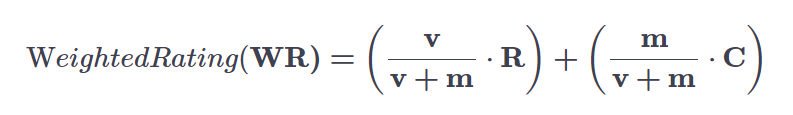

###Where:
1. v is the number of votes for the movie;

2. m is the minimum votes required to be listed in the chart;

3. R is the average rating of the movie;

4. C is the mean vote across the whole report.
###Let us use cutoff m as the 90th percentile.

In [ ]:
# Calculate mean of vote average column
C = movies_df['vote_average'].mean()
print(C)

5.618207215134185


In [ ]:
# Calculate the minimum number of votes required to be in the chart, m
m = movies_df['vote_count'].quantile(0.90)
print(m)

160.0


###So, the number of votes for the movie at 90 percentile is 160. Lets filter out all the movies with vote count more than 160.

In [ ]:
# Filter out all qualified movies into a new DataFrame
q_movies = movies_df.copy().loc[movies_df['vote_count'] >= m]
q_movies.shape

(4555, 24)

In [ ]:
# Movies data shape
movies_df.shape

(45466, 24)

###From the above output, it is clear that there are around 10% movies with vote count more than 160 and qualify to be on this list.

In [ ]:
# Function that computes the weighted rating of each movie
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)

In [ ]:
# Define a new feature 'score' and calculate its value with `weighted_rating()`
q_movies['score'] = q_movies.apply(weighted_rating, axis=1)

In [ ]:
#Sort movies based on score calculated above
q_movies = q_movies.sort_values('score', ascending=False)

#Print the top 15 movies
q_movies[['title', 'vote_count', 'vote_average', 'score']].head(20)

,title,vote_count,vote_average,score
314,The Shawshank Redemption,8358.0,8.5,8.445869
834,The Godfather,6024.0,8.5,8.425439
10309,Dilwale Dulhania Le Jayenge,661.0,9.1,8.421453
12481,The Dark Knight,12269.0,8.3,8.265477
2843,Fight Club,9678.0,8.3,8.256385
292,Pulp Fiction,8670.0,8.3,8.251406
522,Schindler's List,4436.0,8.3,8.206639
23673,Whiplash,4376.0,8.3,8.205404
5481,Spirited Away,3968.0,8.3,8.196055
2211,Life Is Beautiful,3643.0,8.3,8.187171


# <u><b> Content-Based Recommender : Plot Description Based Recommender </b></u>

###In this section, we will learn how to build a system that recommends movies that are similar to a particular movie. To achieve this, you will compute pairwise cosine similarity scores for all movies based on their plot descriptions and recommend movies based on that similarity score threshold. We will use the "overview" variable here as the plot describer.

In [ ]:
#Print plot overviews of the first 5 movies.
movies_df['overview'].head()

0    Led by Woody, Andy's toys live happily in his ...
1    When siblings Judy and Peter discover an encha...
2    A family wedding reignites the ancient feud be...
3    Cheated on, mistreated and stepped on, the wom...
4    Just when George Banks has recovered from his ...
Name: overview, dtype: object

## <u> Obtain vector embeddings of each word in our corpus</u>
###Now we deal with Natural Language Processing problem. Hence we need to extract some kind of features from the above text data before you can compute the similarity and/or dissimilarity between them.
### To do this we use the TF-IDF Vectorizer technique 

* ### Term Frequency (TF) - How many times a particular word appears in a single document?
* ### Inverse Document Frequency (IDF) - It is calculated by taking the log of {number of docs in your corpus divided by the number of docs in which this term appears}. This takes care of words which are present rarely across the corpus.

### This will give us a matrix where each column represents a word in the overview vocabulary, each row represents a movie.

###In its essence, the TF-IDF score is the frequency of a word occurring in a document, down-weighted by the number of documents in which it occurs. This is done to reduce the importance of words that frequently occur in plot overviews and, therefore, their significance in computing the final similarity score.

In [ ]:
#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
movies_df['overview'] = movies_df['overview'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(movies_df['overview'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(45466, 75827)

###We observe that 75,827 different vocabularies or words in our dataset have 45,000 movies.
###We will be using the cosine similarity to calculate a numeric quantity that denotes the similarity between two movies. We use the cosine similarity score since it is relatively easy and fast to calculate (especially when used in conjunction with TF-IDF scores).
###Since we have used the TF-IDF vectorizer, calculating the dot product between each vector will directly give us the cosine similarity score. Therefore, you will use sklearn's linear_kernel() instead of cosine_similarities() since it is faster.

In [ ]:
# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix[0:30000], tfidf_matrix[0:30000])

In [ ]:
cosine_sim.shape

(30000, 30000)

###This would return a matrix of shape 30000x30000, which means each movie overview cosine similarity score with every other movie overview. Hence, each movie will be a 1x30000 column vector where each column will be a similarity score with each movie.

In [ ]:
cosine_sim[1]

array([0.01504121, 1.        , 0.04681953, ..., 0.        , 0.        ,
       0.02303661])

In [ ]:
def get_recommendations(title, cosine_sim=cosine_sim):

  #Construct a reverse map of indices and movie titles
  indices = pd.Series(movies_df.index, index=movies_df['title']).drop_duplicates()
    
  # Get the index of the movie that matches the title
  idx = indices[title]

  # Get the pairwsie similarity scores of all movies with that movie
  sim_scores = list(enumerate(cosine_sim[idx]))

  # Sort the movies based on the similarity scores. Returns list of tuples of indices and the similarity score in sorted manner.
  sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

  # Get the scores of the 10 most similar movies
  sim_scores = sim_scores[1:11]

  # Get the movie indices
  movie_indices = [i[0] for i in sim_scores]

  # Return the top 10 most similar movies
  return movies_df['title'].iloc[movie_indices]

In [ ]:
# The Godfather, The Dark Knight Rises, The Shawshank Redemption, Baghban
get_recommendations('Baghban')

16433         Mujhse Dosti Karoge!
15020                Chalte Chalte
16350    Chori Chori Chupke Chupke
16459          Hum Aapke Hain Koun
22833              Pretty/Handsome
15346           Dhoondte Reh Jaoge
14648              My One and Only
13168        Four Men and a Prayer
21424             Cameron's Closet
1174                           Ran
Name: title, dtype: object